In [1]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

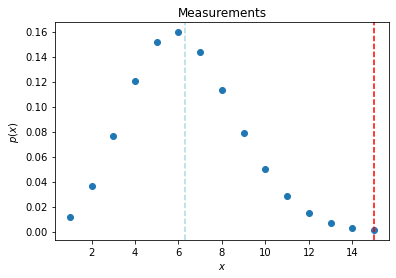

Z = 3.4661629670697414


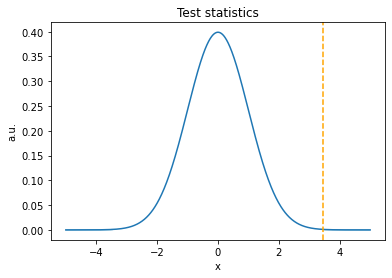

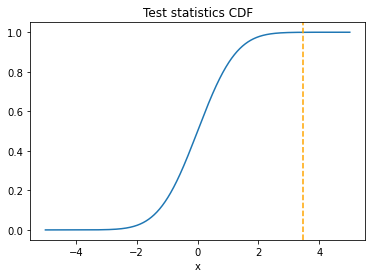

p-value = 0.00026397158691493505
The probability of observing 15 or more hurricances is low


In [2]:
x0 = 15
mu = 6.3

# Plot the measurement and its assumed pdf
x = np.arange(stats.poisson.ppf(0.005, mu), stats.poisson.ppf(0.9995, mu))
t = stats.poisson.pmf(x, mu)
plt.plot(x, t,'o')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

sigma_mu = stats.poisson.std(mu)
# Determine the Z score
Z = (x0 - mu) / sigma_mu
print("Z =", Z)

# Plot the test statistics under normal assumption
xs = np.linspace(-5, 5, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

# Plot the Gaussian Comulative Distribution Function
cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()

# Calculate the p-value considering only the right tail since the observed variable is non negative
pvalue = 1. - stats.norm.cdf(Z)

print("p-value =", pvalue)
print("The probability of observing 15 or more hurricances is low")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

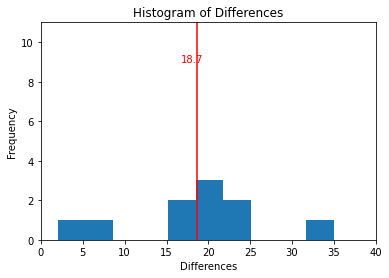

The mean of differences is:  18.7 , which is far away from 0.
Thus, there is the suspect that there is difference between the means
sigma =  10.474970167021958
T =  -3.991846326292112


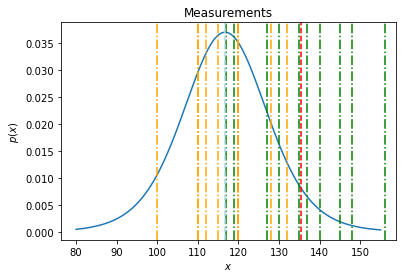

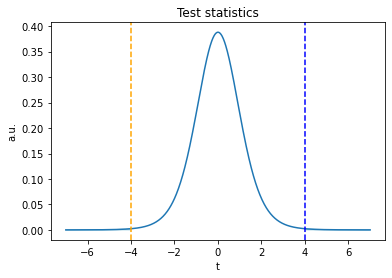

p-value = 0.0031489409354536393


In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
difference = post - pre
# The settings of output plots  
plt.hist(difference, bins=10) 
plt.axvline(x=np.mean(difference), c ='r')
plt.text(np.mean(difference)-2, 9, round(np.mean(difference),3), c='r')
plt.xlim(0, 40)
plt.ylim(0, 11)
plt.title('Histogram of Differences')
plt.xlabel("Differences")
plt.ylabel("Frequency")
plt.show()

print("The mean of differences is: ", np.mean(difference), ", which is far away from 0.")
print("Thus, there is the suspect that there is difference between the means")

n = len(pre)
pre_mean = np.mean(pre)
pre_std = np.std(pre)

post_mean = np.mean(post)
post_std = np.std(post)

sigma = sqrt((pre_std**2 + post_std**2)/2)
print("sigma = ", sigma)

T = (pre_mean - post_mean) / (sigma * sqrt(2/n))

print("T = ", T)

# Plot the measurents
mu = pre_mean
x = np.linspace(80, 155, 1000)
y = stats.t.pdf(x, loc=mu, scale=sigma, df=len(pre) - 1)
plt.plot(x, y)
plt.axvline(post_mean, linestyle='--', color='red')
for l_pre, l_post in zip(pre, post):
    plt.axvline(l_pre, linestyle='-.', color='orange')
    plt.axvline(l_post, linestyle='-.', color='green')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

# Plot the test statistics and its pdf
xs = np.linspace(-7, +7, 1000)
ts = stats.t.pdf(xs, len(pre) - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# Now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, len(pre) - 1) + (1. - stats.t.cdf(-T, len(pre) - 1))

print("p-value =", pvalue)

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

time offset for temp_max =  5.276519951445279
time offset for temp_min =  4.843963514418232


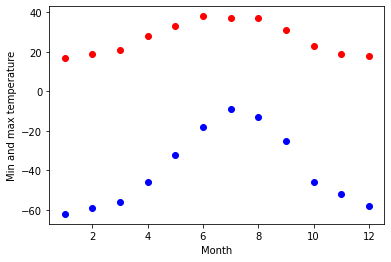

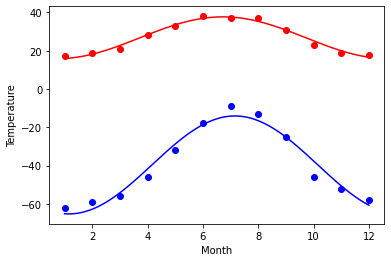

R2_max = 0.9766752925627983 
R_max = 0.9882688361791028
R2_min = 0.9570699008184622 
R_min = 0.9782994944384169
The high values of the correlation coefficients show that the fit is good.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

temp_max_mean = np.mean(temp_max)
temp_max_range = (np.max(temp_max) - np.min(temp_max)) / 2

temp_min_mean = np.mean(temp_min)
temp_min_range = (np.max(temp_min) - np.min(temp_min)) / 2

# Plot these temperature extremes
months = np.arange(12) + 1
plt.plot(months, temp_max, 'ro', months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

# Define a function that can describe min and max temperatures
def year_temp(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

# Fit this function to the data with scipy.optimize.curve_fit()
res_max, cov_max = optimize.curve_fit(year_temp, months, temp_max, [temp_max_mean, temp_max_range, 7])
res_min, cov_min = optimize.curve_fit(year_temp, months, temp_min, [temp_min_mean, temp_min_range, 7])

print('time offset for temp_max = ', res_max[2])
print('time offset for temp_min = ', res_min[2])

timespan_fractionOfMonth = np.linspace(1, 12, num=200)

# Plot the result
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(timespan_fractionOfMonth, year_temp(timespan_fractionOfMonth, *res_max), 'r-')

plt.plot(months, temp_min, 'bo')
plt.plot(timespan_fractionOfMonth, year_temp(timespan_fractionOfMonth, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

months = np.linspace(1, 12, num=12)
tempFit_max = year_temp(months, *res_max)
tempFit_min = year_temp(months, *res_min)

ssr_max = np.sum((temp_max - tempFit_max)**2)
tss_max = np.sum((np.mean(temp_max) - temp_max)**2)

rsq_max = 1 - ssr_max / tss_max

ssr_min = np.sum((temp_min - tempFit_min)**2)
tss_min = np.sum((np.mean(temp_min) - temp_min)**2)

rsq_min = 1 - ssr_min / tss_min

print("R2_max =", rsq_max, "\nR_max =", np.sqrt(rsq_max))
print("R2_min =", rsq_min, "\nR_min =", np.sqrt(rsq_min))
print("The high values of the correlation coefficients show that the fit is good.")

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?


***   Statistics of the residuals   ***
 - Max value : 11.320
 - Min value : -160.850
 - Average : -0.616
 - Standard Deviation : 4.164


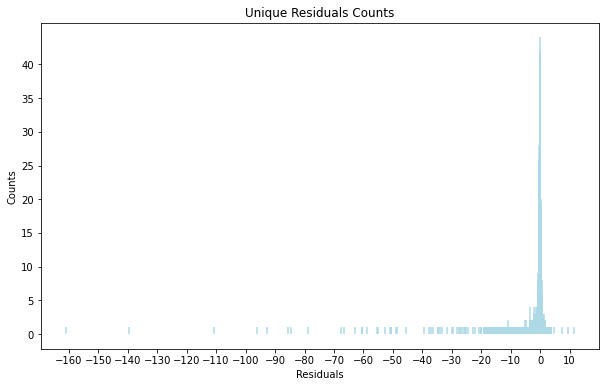

In [5]:
# Normal (Gaussian) distribution function for fitting the histogram: 'a' is the amplitude parameter
def gauss_distr(x, m, s, a):
    return stats.norm.pdf(x, m, s) * a

# Laplace distribution function for fitting the histogram: 'a' is the amplitude parameter
def laplace_distr(x, m, s, a):
    return stats.laplace.pdf(x, m, s) * a

# Function for plotting histogram with additional options
def get_histogram(data, bins='auto', title:str=None, hold_plot=False, plot_Poisson_err=False):
    # input check
    #assert bins in ['auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt'] or type(bins)==int or type(bins)==np.ndarray
    plt.figure(figsize=(10,6))
    hist, bins, _ = plt.hist(data, bins=bins, color='lightblue')
    plt.title(title)
    plt.ylabel("Counts")
    plt.xlabel("Residuals")
    plt.ylim(0)
    plt.grid()
    # plot Poisson errorbars
    poisson_errors = 1/(hist ** 0.5)
    if plot_Poisson_err:
        bin_centers = bins[:-1] + np.diff(bins)/2
        plt.errorbar(bin_centers, hist, yerr=poisson_errors, fmt='.', c='k', ecolor='r')
    if not hold_plot:
        plt.show()
    
    return hist, bins, poisson_errors

# Function for computing p-value in order to check goodnes-of-fit
def chi2HistogramFitTest(histo, histofit):
    ndof = len(histo) - 1
    
    print("n degrees of freedom =", ndof)
    
    sigma2 = histo
    chi2 = np.sum((histo - histofit) ** 2 / sigma2)
    chi2 /= 5
    print("chi2 =", chi2)
    
    p = np.arange(0, 1.2 * chi2, 0.1)
    ts = stats.chi2.pdf(p, df=ndof)
    plt.plot(p, ts)
    plt.title("$\chi^2$ test statistics")
    plt.axvline(chi2, color='red')
    plt.fill_between(p, ts, where=(p > chi2), color='lightblue')
    plt.show()
    plt.plot(p, stats.chi2.cdf(p, df=ndof))

    plt.title("$\chi^2$ test statistics CDF")
    plt.axvline(chi2, color='r')
    plt.show()

    # calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
    pvalue = 1. - stats.chi2.cdf(chi2, ndof)
    print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory
    
    return pvalue
    
# Read data
data_path = "data/residuals_261.pkl"
data = np.load(data_path, allow_pickle=True).reshape(-1)[0]
residuals = data['residuals']

print("\n***   Statistics of the residuals   ***")
print(" - Max value : %0.3f" % max(residuals))
print(" - Min value : %0.3f" % min(residuals))
print(" - Average : %0.3f" % np.mean(residuals))
print(" - Standard Deviation : %0.3f" % np.std(residuals))

# Plot the unique residuals with their count
uniques, counts = np.unique(residuals, return_counts=True)

plt.figure(figsize=(10,6))
plt.vlines(uniques, ymin=0, ymax=counts, colors='lightblue')
plt.title("Unique Residuals Counts")
plt.ylabel("Counts")
plt.xlabel("Residuals")
plt.yticks([k for k in range(0,max(counts),5)])
plt.xticks([k for k in range(int(min(uniques)),int(max(uniques)),10)])
plt.show()    

After plotting the counts of the unique residuals, it can be seen that the majority of them falls close to the value 0, with some outlier residuals falling "far-away" from the 0. So, by plotting the unique counts of the residuals ( 𝑅 ) belonging to the range  [𝜇𝑅−𝜎𝑅,𝜇𝑅+𝜎𝑅]  we have a close-up view of the residual values around the mean, which allows to determine the nature of the distribution of the histogram of the residuals.

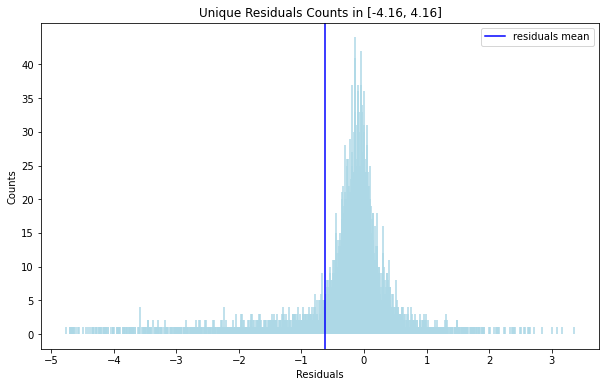

In [6]:
# Get the counts of the residuals having value in the specified range
threshold_val = np.std(residuals)
residuals_mean = np.mean(residuals)
ranged_residuals = residuals[residuals <= residuals_mean + threshold_val]
ranged_residuals = ranged_residuals[ranged_residuals >= residuals_mean - threshold_val]

# Plot the unique residuals counts considering only the restricted range
ranged_uniques, ranged_counts = np.unique(ranged_residuals, return_counts=True)

plt.figure(figsize=(10,6))
plt.vlines(ranged_uniques, ymin=0, ymax=ranged_counts, colors='lightblue')
plt.axvline(x=np.mean(residuals), c='blue', label='residuals mean')
plt.title("Unique Residuals Counts in [-%0.2f, %0.2f]" % (threshold_val, threshold_val))
plt.ylabel("Counts")
plt.xlabel("Residuals")
plt.yticks([k for k in range(0,max(ranged_counts),5)])
plt.legend()
plt.show()

From this close-up view of the residual counts, we can guess that possible fits to the histogram can be a Gaussian or a Laplacian distribution. The histogram of the residuals is computed by using the Freedman-Diaconis estimator to create the appropriate histogram bins, in order to have a robust (resilient to outliers) estimator that takes into account data variability and data size (as reported among all the methods proposed in numpy.histogram_bin_edges).

C:\Users\daria\AppData\Local\Temp/ipykernel_15564/617024687.py:21: RuntimeWarning: divide by zero encountered in true_divide
  poisson_errors = 1/(hist ** 0.5)


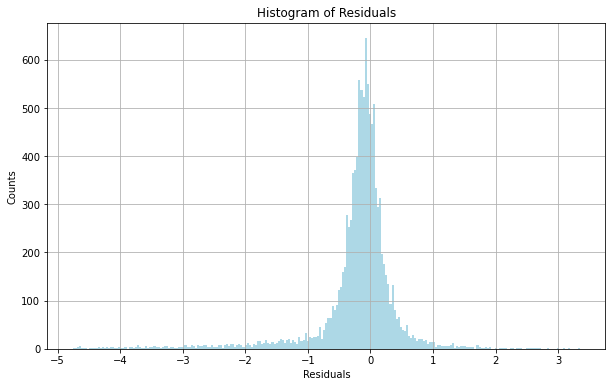

In [7]:
# Get and plot histogram of residuals eliminating the distribution outliers

bin_method='fd' #Freedman-Diaconis 
hist, bins, poisson_errors = get_histogram(ranged_residuals, 
                                           bins=bin_method, 
                                           title='Histogram of Residuals',
                                           plot_Poisson_err=False
                                           )


n degrees of freedom = 220
chi2 = 349.4703873968618


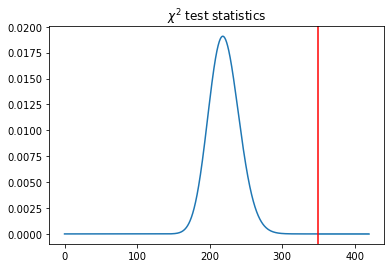

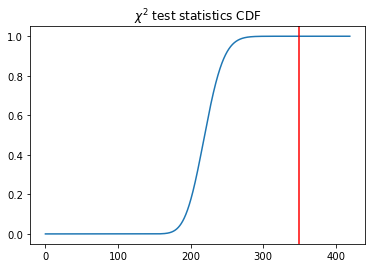

p-value = 6.136419461455489e-08
n degrees of freedom = 220
chi2 = 180.5307582491649


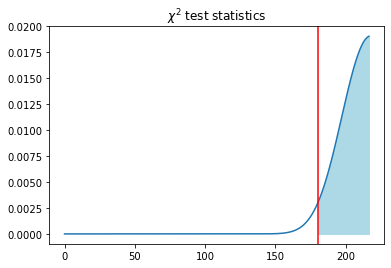

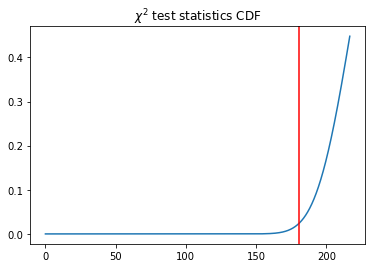

p-value = 0.9758848294209406


C:\Users\daria\AppData\Local\Temp/ipykernel_15564/617024687.py:21: RuntimeWarning: divide by zero encountered in true_divide
  poisson_errors = 1/(hist ** 0.5)


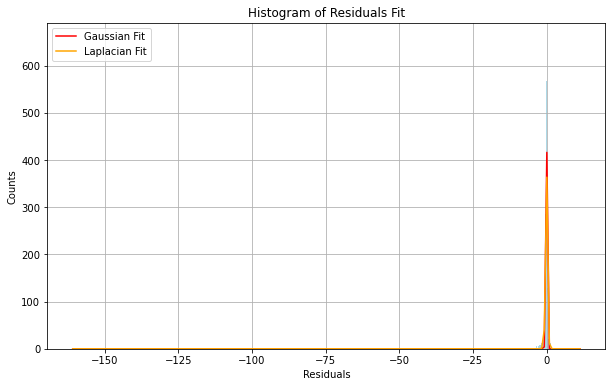

C:\Users\daria\AppData\Local\Temp/ipykernel_15564/617024687.py:21: RuntimeWarning: divide by zero encountered in true_divide
  poisson_errors = 1/(hist ** 0.5)


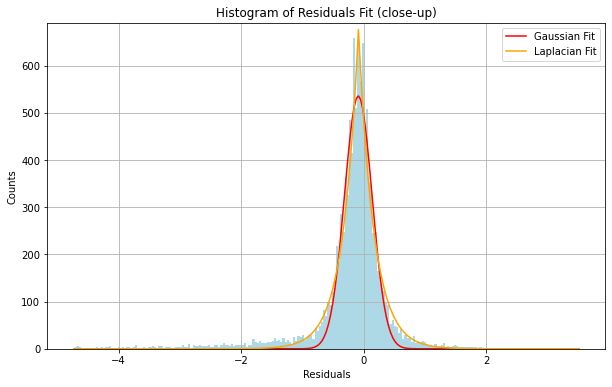

The Laplacian function fits well the data while the Gaussian does not


In [8]:
# Mask histogram bins withzero count
mask = hist > 0
hist = hist[mask]

# Get centers of the bins
bin_centers = bins[:-1] + np.diff(bins)/2
bin_centers = bin_centers[mask]

# Fit the Gaussian function to the histogram
popt, pcov = optimize.curve_fit(gauss_distr, xdata=bin_centers, ydata=hist)
m_opt_gauss, s_opt_gauss, a_opt_gauss = popt

# Fit the Laplacian function to the histogram
popt, pcov = optimize.curve_fit(laplace_distr, xdata=bin_centers, ydata=hist)
m_opt_laplace, s_opt_laplace, a_opt_laplace = popt

histofit_gauss = gauss_distr(bin_centers, m_opt_gauss, s_opt_gauss, a_opt_gauss)
histofit_laplace = laplace_distr(bin_centers, m_opt_laplace, s_opt_laplace, a_opt_laplace)
p_val_fitgauss = chi2HistogramFitTest(hist, histofit_gauss)
p_val_fitlaplace = chi2HistogramFitTest(hist, histofit_laplace)

# Plot the histogram and both the histogram fits
hist, bins,_ = get_histogram(residuals, bins=bin_method, title='Histogram of Residuals Fit', hold_plot=True)
x_dense = np.linspace(min(residuals), max(residuals), 200)
plt.plot(x_dense, gauss_distr(x_dense, m_opt_gauss, s_opt_gauss, a_opt_gauss), color='red', label='Gaussian Fit')
plt.plot(x_dense, laplace_distr(x_dense, m_opt_laplace, s_opt_laplace, a_opt_laplace), color='orange', label='Laplacian Fit')
plt.legend(loc='best')
plt.show()

# Close-up plot of the the histogram and both the histogram fits around the mean of the histogram 
# (using the ranged_residuals defined before)

# extract the bins in the specified range. Note: Bins are not re-computed in order to reproduce a 
# true zoom-in of the histogram fit (recomputing the bins from the ranged_residuals will produce another histogram)
ranged_bins = bins[bins >= residuals_mean - threshold_val]
ranged_bins = ranged_bins[ranged_bins <= residuals_mean + threshold_val]

get_histogram(ranged_residuals, bins=ranged_bins, title='Histogram of Residuals Fit (close-up)', hold_plot=True)
ranged_bin_centers = ranged_bins[:-1] + np.diff(ranged_bins)/2
plt.plot(ranged_bin_centers, gauss_distr(ranged_bin_centers, m_opt_gauss, s_opt_gauss, a_opt_gauss), color='red', label='Gaussian Fit')
plt.plot(ranged_bin_centers, laplace_distr(ranged_bin_centers, m_opt_laplace, s_opt_laplace, a_opt_laplace), color='orange', label='Laplacian Fit')
plt.legend(loc='best')
plt.show()

print("The Laplacian function fits well the data while the Gaussian does not")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

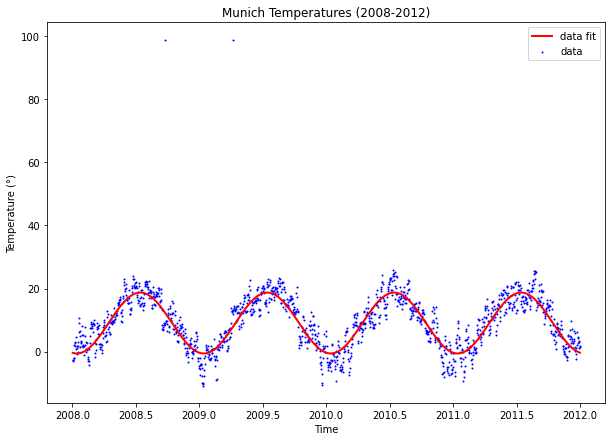


*** Best-fit values of the parameters ***

	 a = -9.671276787992156

	 b = 12.342717348044395

	 c = 9.0525621024537 


*** Overall average temperature in Munich : 8.94 


*** Daily average value predicted by the model ***

	 Hottest time of the year : 18.72°

	 Coldest time of the year : -0.62°


In [9]:
# Function to fit
def f(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

# Read data
path = "data/munich_temperatures_average_with_bad_data.txt"
data = np.loadtxt(fname=path)
time = data[:,0]
temperatures = data[:,1]

# Get best-fit values of the parameters for function f
popt_f, pcov_f = optimize.curve_fit(f, xdata=time, ydata=temperatures)
a_opt_f, b_opt_f, c_opt_f = popt_f

# Fit all the data with the best-fit parameters
data_fit_f = f(time, a_opt_f, b_opt_f, c_opt_f)

# Plot data and fit from 2008 to 2012
ranged_data_mask = np.bitwise_and(time >= 2008., time <= 2012.)
ranged_time = time[ranged_data_mask]
ranged_temperatures = temperatures[ranged_data_mask]
ranged_data_fit = data_fit_f[ranged_data_mask]

plt.figure(figsize=(10,7))
plt.scatter(ranged_time, ranged_temperatures, c='blue', s=1, label='data')
plt.title("Munich Temperatures (2008-2012)")
plt.ylabel("Temperature (°)")
plt.xlabel("Time")
plt.plot(ranged_time, ranged_data_fit, color='red', linewidth=2, label='data fit')
plt.legend(loc='best')
plt.show()

# Best-fit values of the parameters
print(f"\n*** Best-fit values of the parameters ***")
print("\n\t a =", a_opt_f)
print("\n\t b =", b_opt_f)
print("\n\t c =", c_opt_f, "\n")

# Overall average temperature in Munich
# fit all data with the best-fit values of the parameters
average_temp = np.mean(data_fit_f)
print("\n*** Overall average temperature in Munich : %0.2f" % average_temp, "\n")

# Typical daily average values predicted by the model for the coldest and hottest time of year
max_temp = np.max(data_fit_f)
min_temp = np.min(data_fit_f)
print(f"\n*** Daily average value predicted by the model ***")
print("\n\t Hottest time of the year : %0.2f°" % max_temp)
print("\n\t Coldest time of the year : %0.2f°" % min_temp)

**RE: What is the meaning of the $b$ parameter, and what physical sense does it have?**

The parameter $b$ denotes the phase shift on the cosine function, which allows a displacement the function along the time axis (x-axis). In this scenario, the phase shift parameter allows for shifting the cosine function in order to fit the data with respect to the constraint given by the initial temperatures.

In [10]:
# Define function g, with the requested additional parameter
def g(t, a, b, c, d):
    return a * np.cos( 2*np.pi * b * t + c) + d

# Utility function for computing RSS
def get_RSS(data, fit_data):
    return np.sum((data - fit_data) ** 2)

# Get best-fit values of the parameters for function g
popt_g, pcov_g = optimize.curve_fit(g, xdata=time, ydata=temperatures)
a_opt_g, b_opt_g, c_opt_g, d_opt_g = popt_g

# Fit all the data with the best-fit parameters
data_fit_g = g(time, a_opt_g, b_opt_g, c_opt_g, d_opt_g)

# Find RSS of f and g
RSS_f = get_RSS(temperatures, data_fit_f)
RSS_g = get_RSS(temperatures, data_fit_g)

print(f"\n***  RSS value for the best-fit  ***")
print("\n\t f(x) : %0.4f" % RSS_f)
print("\n\t g(x) : %0.4f" % RSS_g)

# Fisher F-test
# Define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    return pval

# Compute the p-value
p_val = Ftest(ssr_1=RSS_f, ssr_2=RSS_g, ndof_1=2, ndof_2=3, nbins=data.shape[0])

print("\n***  Fisher F-test  ***")
print("\n\t p-value : %0.2f" % p_val)

alpha = 0.1

if p_val >= alpha:
    print("\n\t No additional parameter is required : f is the best model")
else:
    print("\n\t The additional parameter is required : g is the best model")


***  RSS value for the best-fit  ***

	 f(x) : 694209.8326

	 g(x) : 694186.2523

***  Fisher F-test  ***

	 p-value : 0.63

	 No additional parameter is required : f is the best model
